In [ ]:
pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 75.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing

In [ ]:
import os
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Activation,Dense, Dropout, Flatten

import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

from keras.models import Model

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imageSize=128
train_dir = "/content/drive/MyDrive/BREAST_MID/Train"
test_dir =  "/content/drive/MyDrive/BREAST_MID/Test"
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):

            if folderName in ['MAL']:
                label = 0
            elif folderName in ['BEN']:
                label = 1
                '''
            elif folderName in ['Opacity']:
                label = 2
            elif folderName in ['pneumonia']:
                label = 3
                '''
            else:
                label = 4

            for image_filename in tqdm(os.listdir(folder + '/'+folderName)):


                img_file = cv2.imread(folder + '/'+folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file)

                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)

    return X,y
X_train, y_train = get_data(train_dir) # Un-comment to use full dataset: Step 1 of 2
X_test, y_test= get_data(test_dir)


100%|██████████| 100/100 [00:07<00:00, 13.23it/s]


In [ ]:
# AlexNet model
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
num_classes = 2
model = AlexNet((imageSize, imageSize, 3), num_classes)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [ ]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=METRICS)
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         132

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/BREAST_MID/Train",
                                                 target_size = (imageSize, imageSize),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/BREAST_MID/Test",
                                            target_size = (imageSize, imageSize),
                                            batch_size =16,
                                            class_mode = 'categorical')

Found 840 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
epochs=2

In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
53/53 [==============================] - 55s 1s/step - loss: 3.3520 - tp: 429.0000 - fp: 411.0000 - tn: 429.0000 - fn: 411.0000 - accuracy: 0.5107 - precision: 0.5107 - recall: 0.5107 - auc: 0.5252 - val_loss: 0.6747 - val_tp: 125.0000 - val_fp: 75.0000 - val_tn: 125.0000 - val_fn: 75.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7117
Epoch 2/2
53/53 [==============================] - 54s 1s/step - loss: 0.6308 - tp: 564.0000 - fp: 276.0000 - tn: 564.0000 - fn: 276.0000 - accuracy: 0.6714 - precision: 0.6714 - recall: 0.6714 - auc: 0.7117 - val_loss: 0.6953 - val_tp: 141.0000 - val_fp: 59.0000 - val_tn: 141.0000 - val_fn: 59.0000 - val_accuracy: 0.7050 - val_precision: 0.7050 - val_recall: 0.7050 - val_auc: 0.7848


In [ ]:
# Evaluate model
score = model.evaluate(test_set,verbose=0)
print('\nKeras CNN - accuracy:', score[5], '\n')


Keras CNN - accuracy: 0.7049999833106995 



In [ ]:
model.save("alexnet.h5")

In [ ]:
score

[0.6952669620513916,
 141.0,
 59.0,
 141.0,
 59.0,
 0.7049999833106995,
 0.7049999833106995,
 0.7049999833106995,
 0.7847749590873718]

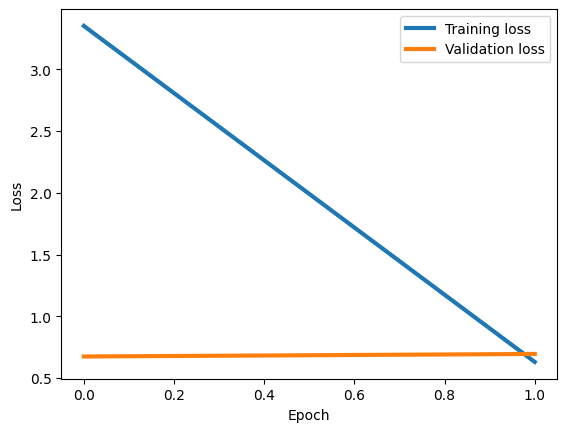

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss', linewidth=3)
plt.plot(history.history['val_loss'], label='Validation loss', linewidth=3)
plt.xlabel('Epoch'); plt.ylabel('Loss');
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

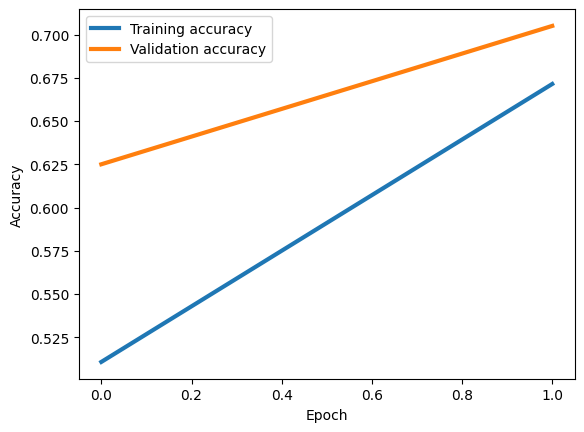

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy', linewidth=3)
plt.plot(history.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epoch'); plt.ylabel('Accuracy');
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
Y_pred=model.predict(test_set)
y_pred=np.argmax(Y_pred,axis=1)

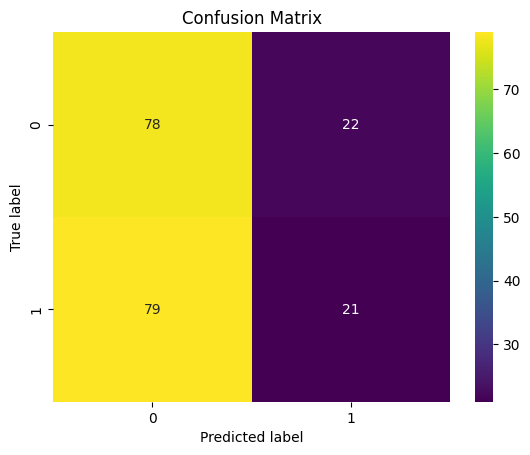

In [ ]:
cm=confusion_matrix(test_set.classes,y_pred)
f = sns.heatmap(cm, annot=True, fmt='d',cmap='viridis')
f.set_xlabel('Predicted label');f.set_ylabel('True label');
f.set_title('Confusion Matrix');

In [ ]:
# Extracting Intermediate Layers Output

In [ ]:
from keras.models import Model

In [ ]:
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         132

In [ ]:
##### Checking and extracting the indexes of "Convolutional Layers"
t=list(model.layers)
conv_index=[]
for i in range(len(t)):
  layer=t[i]
  if 'conv' in layer.name:
    conv_index.append(i)

print("Indexes of Convolutional Layers are ",conv_index)

Indexes of Convolutional Layers are  [0, 2, 4, 5, 6]


In [ ]:
##### Checking layer name and output shapes
for i in conv_index:
  layer=model.layers[i]
  print("layer name is :{}            output Shape is : {}".format(layer.name,layer.output.shape))

layer name is :conv2d            output Shape is : (None, 30, 30, 96)
layer name is :conv2d_1            output Shape is : (None, 14, 14, 256)
layer name is :conv2d_2            output Shape is : (None, 6, 6, 384)
layer name is :conv2d_3            output Shape is : (None, 6, 6, 384)
layer name is :conv2d_4            output Shape is : (None, 6, 6, 256)


In [ ]:
#preprocessing image
def pre_process(img):
  img=img_to_array(img)
  img=img/255.0
  img=np.expand_dims(img,axis=0)
  return img

#Plotting Intermediate Layers output
def plot_intermediate(f_maps,no_of_images):
  s=no_of_images
  ix=1
  ax=pyplot.figure(figsize=(16,16))
  for i in range(s):
    for j in range(s):
      ax=pyplot.subplot(s,s,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(f_maps[0,:,:,ix-1],aspect='auto',cmap='hot')
      ix+=1

In [ ]:
#Extracting convolution layer1 output
conv_1_output=Model(inputs=model.inputs,outputs=model.layers[0].output)
conv_1_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
Total params: 34,944
Trainable params: 34,944
Non-trainable params: 0
_________________________________________________________________


In [ ]:
layer_outputs=[layer.output for layer in model.layers[0:]]

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 30, 30, 96) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 14, 14, 96) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 14, 14, 256) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 6, 6, 384) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 6, 6, 384) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 1000) dtype=float32 (created by laye

In [ ]:
visualize_model=Model(inputs=model.input,outputs=layer_outputs)

In [ ]:
visualize_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         8851

In [ ]:
img=load_img("/content/drive/MyDrive/BREAST_MID/Test/MAL/M (8).png",target_size=(128,128))
x=img_to_array(img)
x=x.reshape((1,128,128,3))
feature_maps=visualize_model.predict(x)
layer_names=[layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'conv2d_3',
 'conv2d_4',
 'max_pooling2d_2',
 'flatten',
 'dense',
 'dense_1',
 'dense_2',
 'dense_3']

(1, 30, 30, 96)
(1, 14, 14, 96)
(1, 14, 14, 256)
(1, 6, 6, 256)
(1, 6, 6, 384)
(1, 6, 6, 384)
(1, 6, 6, 256)
(1, 2, 2, 256)
(1, 1024)
(1, 4096)
(1, 4096)
(1, 1000)
(1, 2)


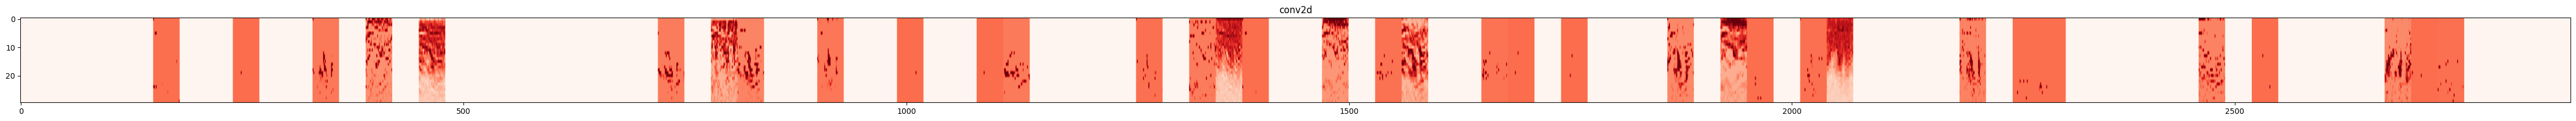

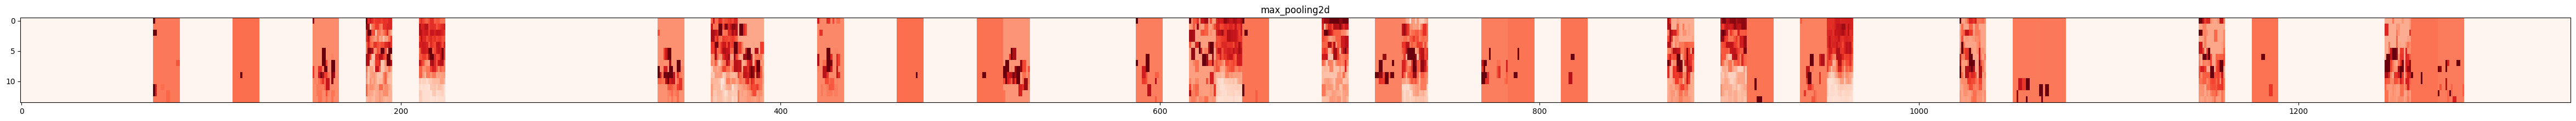

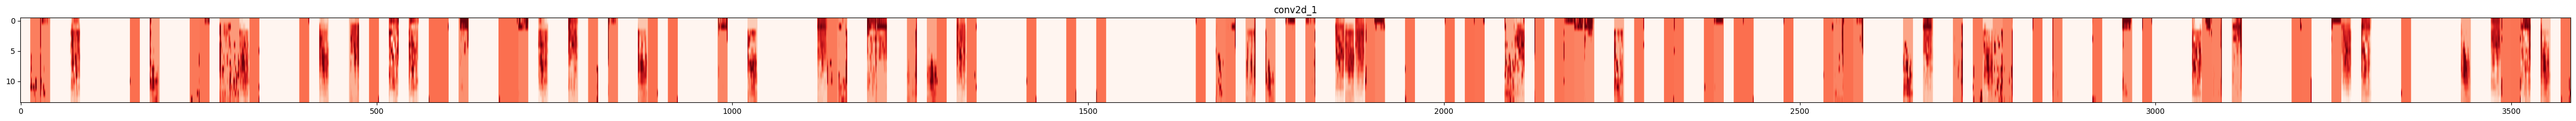

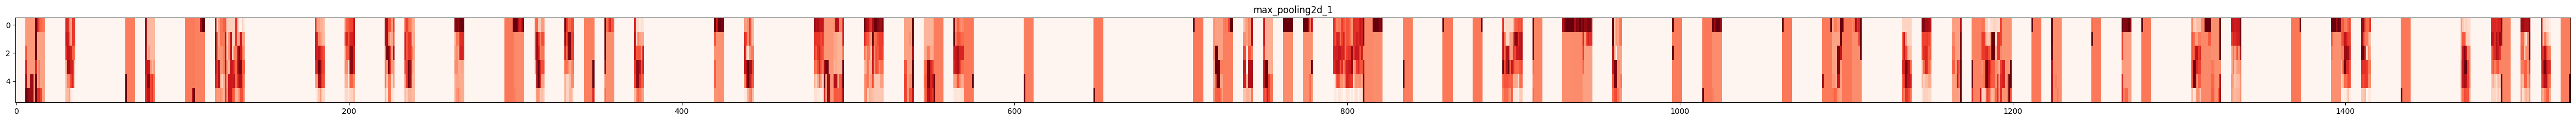

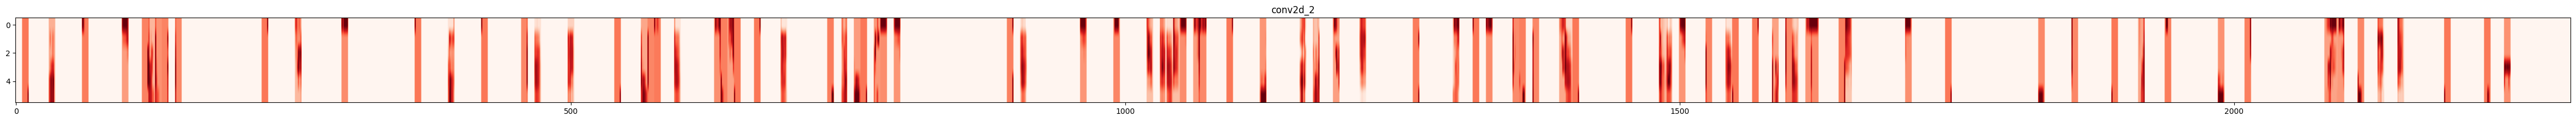

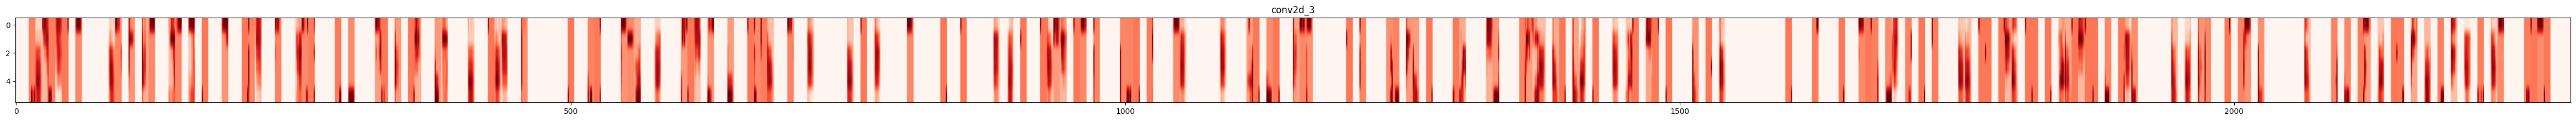

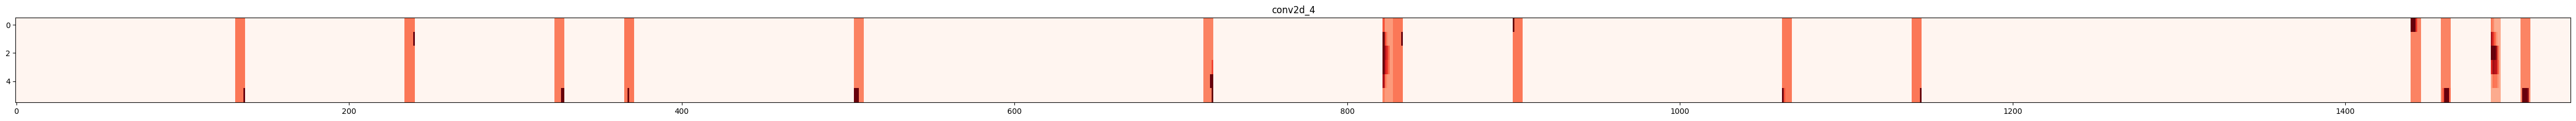

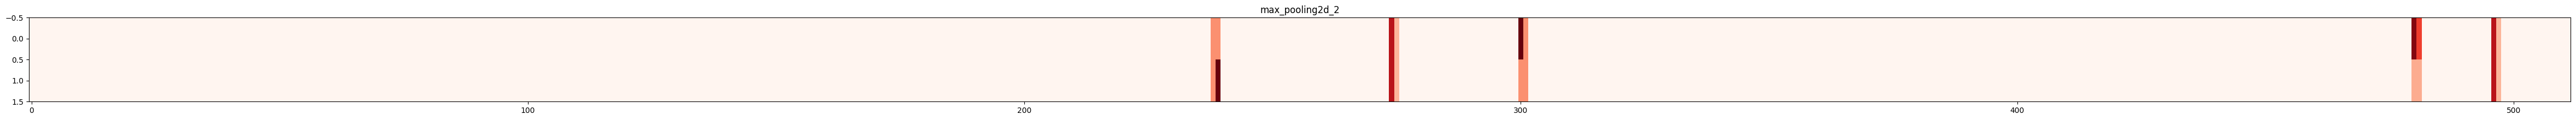

In [ ]:
for layer_names,feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape)==4:

    channels=feature_maps.shape[-1]
    size=feature_maps.shape[1]
    display_grid=np.zeros((size,size*channels))
    for i in range(channels):
      x=feature_maps[0,:,:,i]
      x-=x.mean()
      x/=x.std()
      x*=64
      x+=128
      x=np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size:(i+1)*size]=x
    scale=20./channels
    plt.figure(figsize=(scale*channels+40,2))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='Reds')
